In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Confirmed daily']]
data.columns = ['ds', 'y']

# Modeling

### Model creation

In [4]:
model_args = {
    'seasonality_mode': 'additive', 
    'changepoint_prior_scale': 0.6,
    'weekly_seasonality': 10,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [5]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
future = model.make_future_dataframe(periods = 1)
forecast = model.predict(future)

In [7]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
63,2020-06-08,599.0,384.291318,289.987191,481.643469
64,2020-06-09,400.0,407.263780,311.510476,504.759988
65,2020-06-10,282.0,393.756875,293.940667,486.817261
66,2020-06-11,359.0,394.026352,299.736486,494.928894
67,2020-06-12,376.0,414.195361,320.366168,509.491015
68,2020-06-13,440.0,408.274271,315.018948,509.858777
69,2020-06-14,375.0,407.452916,313.070588,498.904463
70,2020-06-15,396.0,396.259919,301.633871,490.858194
71,2020-06-16,407.0,419.232381,321.380018,517.281221
72,2020-06-17,NaN,405.725476,308.877167,501.186971


### Model explanation

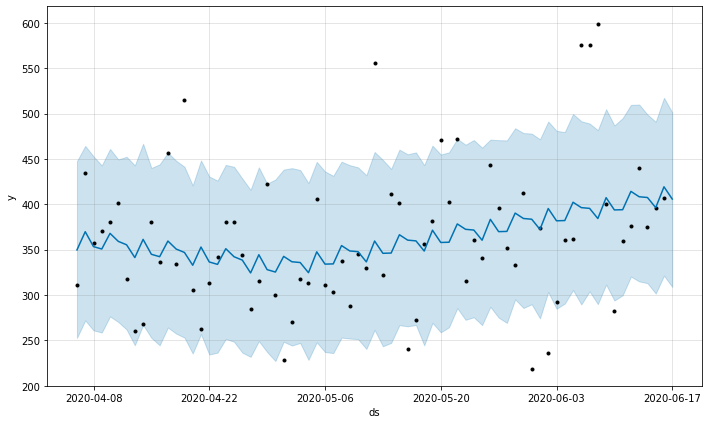

In [8]:
fig = model.plot(forecast)

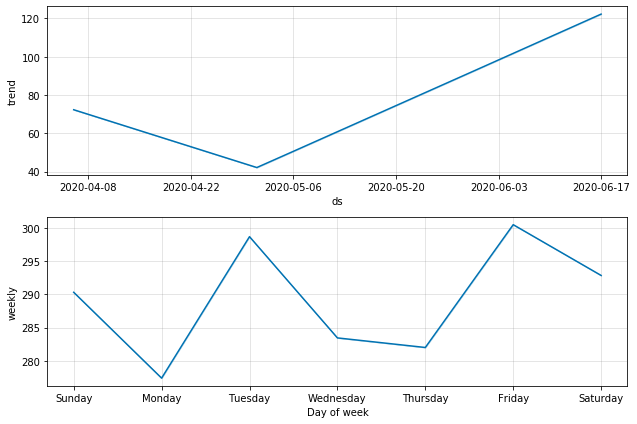

In [9]:
fig = model.plot_components(forecast)

### Model performance

In [10]:
results = cross_validation(model, initial = '65 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 6 forecasts with cutoffs between 2020-06-10 00:00:00 and 2020-06-15 00:00:00


In [11]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-11,406.705673,308.349707,503.284679,359.0,2020-06-10
1,2020-06-12,422.939274,328.268704,521.206691,376.0,2020-06-11
2,2020-06-13,405.958373,304.531245,505.184026,440.0,2020-06-12
3,2020-06-14,415.398801,315.225142,511.686937,375.0,2020-06-13
4,2020-06-15,398.312066,304.053639,496.334544,396.0,2020-06-14
5,2020-06-16,421.882439,321.753805,513.781510,407.0,2020-06-15


In [12]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1249.475796,35.347925,31.046647,0.080871,0.092549,1.0


### Tomorrow prediction

In [13]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

406